In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [7]:
X = digits.data
X.shape

(1797, 64)

In [8]:
y = digits.target
y.shape

(1797,)

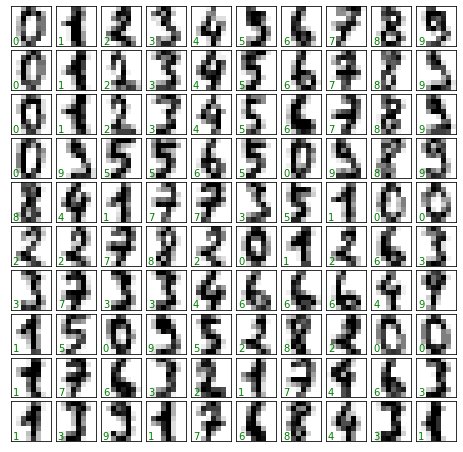

In [4]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

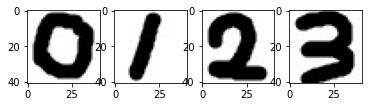

In [19]:
from PIL import Image
import glob
path = glob.glob('./data/*.jpg')
for i, p in enumerate(path):
    plt.subplot(1,4,i+1)
    plt.imshow(Image.open(p))

In [20]:
pics = []
for pt in path:
    pic = Image.open(pt)
    pic = pic.resize((8,8))
    picv = 255-np.array(pic)[:,:,0]
    picv = np.reshape(picv, (1,-1))
    pics.append(picv)

pics = np.vstack(pics)
pics.shape

(4, 64)

In [21]:
pics_pred = model.predict(pics)
pics_pred

array([0, 6, 2, 3])

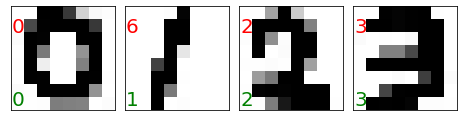

In [22]:
pic_label = [0,1,2,3]
pic_img = np.reshape(pics, (-1,8,8))
fig, axes = plt.subplots(1, 4, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pic_img[i], cmap='binary', interpolation='nearest')
    ax.text(0.01, 0.05, str(pic_label[i]),
            transform=ax.transAxes, color='green', size=20)
    ax.text(0.01, 0.75, str(pics_pred[i]),
            transform=ax.transAxes, color='red', size=20)

In [37]:
import gzip

def read_data():
    files = ['t10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'] 
    current = './data/fashion_mnist_data/'
    paths = []
    for i in range(len(files)):
         paths.append(current+ files[i]) 
    
    with gzip.open(paths[0], 'rb') as lbpath:
        label = np.frombuffer(lbpath.read(), np.uint8, offset=8)
 
    with gzip.open(paths[1], 'rb') as imgpath:
        data = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(label), 28, 28)
        
    return data, label

images, labels = read_data()
images.shape 

(10000, 28, 28)

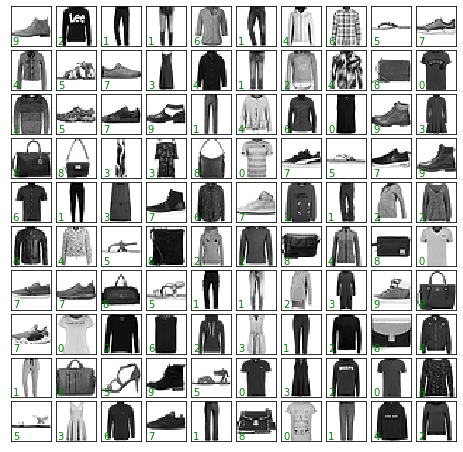

In [38]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05,0.05,str(labels[i]),
           transform=ax.transAxes, color='green')

In [ ]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [46]:
Label = np.arange(10)
Description = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
df = pd.DataFrame(data={'Label':Label, 'Description':Description})
df

,Label,Description
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [39]:
images = np.reshape(images, (-1, 28*28))
images.shape

(10000, 784)

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(images, labels, random_state=0)
print(Xtrain.shape)
print(Xtest.shape)

(7500, 784)
(2500, 784)


In [42]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.7856